# CAVIAR Network Analysis

**- We will analyze and understand a time-varying criminal network that was repeatedly disrupted by police forces, and how the criminal network reoriented in response to the seizures of product by the police forces.**

**Objective:**
- Understand, create, and visualize the data in phases.
- Apply different network centrality measures and understand the important nodes of the network.
- Visualize the centrality measures of the important nodes across phases.

In [1]:
%matplotlib inline

import networkx as nx

from decorator import decorator

from networkx.utils import create_random_state, create_py_random_state

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

# To get rid of warning messages
warnings.filterwarnings('ignore') 

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{ : , .2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')

In [2]:
# Loading the data from 11 phases

P1 = pd.read_csv("CAVIAR_Phases - Notebook/phase1.csv")

P2 = pd.read_csv("CAVIAR_Phases - Notebook/phase2.csv")

P3 = pd.read_csv("CAVIAR_Phases - Notebook/phase3.csv")

P4 = pd.read_csv("CAVIAR_Phases - Notebook/phase4.csv")

P5 = pd.read_csv("CAVIAR_Phases - Notebook/phase5.csv")

P6 = pd.read_csv("CAVIAR_Phases - Notebook/phase6.csv")

P7 = pd.read_csv("CAVIAR_Phases - Notebook/phase7.csv")

P8 = pd.read_csv("CAVIAR_Phases - Notebook/phase8.csv")

P9 = pd.read_csv("CAVIAR_Phases - Notebook/phase9.csv")

P10 = pd.read_csv("CAVIAR_Phases - Notebook/phase10.csv")

P11 = pd.read_csv("CAVIAR_Phases - Notebook/phase11.csv")

In [3]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


So, we have the data in the form of an adjacency matrix represented through a DataFrame.

**Observations:**

- The first column (Unnamed: 0) needs to be set as the index.
- The column names and the indices should have the same data type.


In [4]:
# Setting first column as the index to achieve the adjacency matrix for each phase
# Defining a list with the phases
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

# Set the first column as the index for all the DataFrames
for p in phases:
    p.set_index(p.columns[0], inplace = True)

In [5]:
P1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Now, that we have set the index, check for the consistency in column names and indices data type
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
        '64', '8'],
       dtype='object'))

**Observation:**

- The above output shows that the indices are of integer data type and the column names are of object data type.
- Let's convert the column names to integer data types.

In [7]:
# Let's convert the column names to integer types
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

col = []

for p in phases:                 # Running the loop for each phase (11)
    for i in p.columns:          # Running the loop for each column of each phase
        col.append(int(i))       # Appending column names to the list 'col'
    p.columns = col              # Updating the column names for each phase
    col = []                     # Reinitiating the list 'col' as an empty list 

In [8]:
# Let's check if the transformation worked
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'))

**Observation:**

- We observe that the transformation has worked. Both, indices as well as column names, are of integer data type.  

## **Generating Graphs**

In [9]:
# Create graphs from the adjacency matrices

graphs = []

for i, p in enumerate(phases):
    g = 'graph' + str(i + 1) 
    
    print(g)
    
    g = nx.from_pandas_adjacency(p)
    
    graphs.append(g)
    
    print(g.nodes())

graph1
[5, 83, 3, 90, 88, 85, 89, 4, 8, 64, 6, 54, 7, 2, 1]
graph2
[3, 85, 83, 90, 64, 6, 2, 7, 86, 88, 89, 12, 11, 9, 76, 98, 47, 97, 56, 10, 55, 8, 5, 1]
graph3
[5, 83, 88, 48, 89, 3, 7, 6, 52, 2, 90, 86, 85, 4, 12, 51, 13, 99, 50, 107, 49, 84, 32, 11, 35, 34, 9, 76, 56, 10, 55, 8, 1]
graph4
[5, 83, 88, 90, 85, 3, 76, 47, 6, 106, 8, 7, 86, 89, 4, 15, 52, 14, 12, 31, 109, 63, 51, 13, 107, 49, 84, 53, 11, 35, 9, 2, 1]
graph5
[5, 88, 83, 6, 86, 76, 89, 3, 32, 100, 34, 11, 8, 15, 55, 2, 85, 4, 19, 82, 25, 17, 18, 108, 12, 31, 13, 84, 9, 47, 7, 1]
graph6
[3, 8, 11, 13, 84, 12, 85, 82, 15, 83, 5, 19, 25, 31, 76, 2, 4, 20, 87, 77, 78, 18, 14, 9, 6, 1]
graph7
[3, 18, 83, 81, 2, 34, 9, 14, 88, 8, 55, 17, 5, 11, 69, 12, 77, 19, 85, 4, 15, 28, 75, 16, 68, 61, 79, 74, 22, 20, 87, 78, 76, 6, 62, 1]
graph8
[3, 8, 18, 59, 84, 80, 78, 35, 14, 39, 23, 73, 12, 17, 87, 34, 83, 85, 37, 33, 16, 19, 25, 11, 76, 2, 4, 36, 91, 38, 67, 81, 28, 22, 20, 77, 82, 13, 9, 6, 86, 1]
graph9
[3, 13, 17, 29, 30, 76, 8

****************************************************************************************
Graph for phase: 1


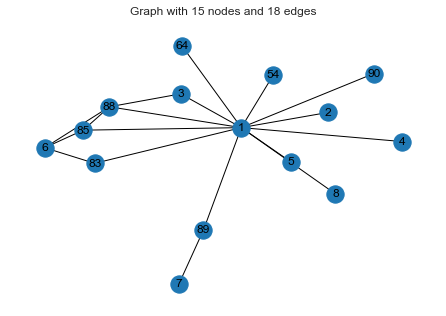

****************************************************************************************
Graph for phase: 2


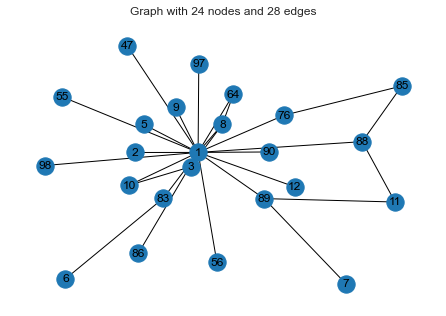

****************************************************************************************
Graph for phase: 3


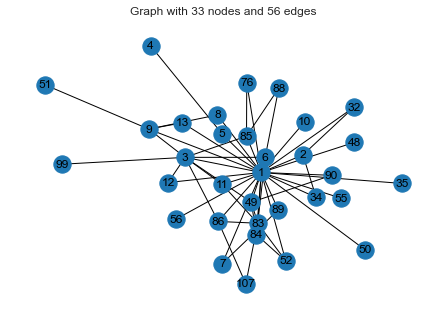

****************************************************************************************
Graph for phase: 4


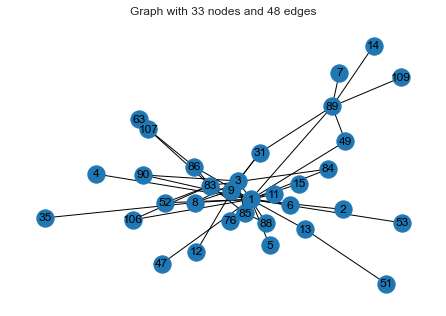

****************************************************************************************
Graph for phase: 5


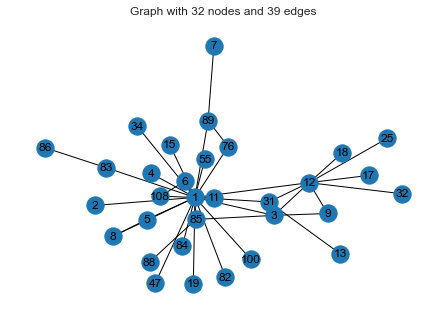

****************************************************************************************
Graph for phase: 6


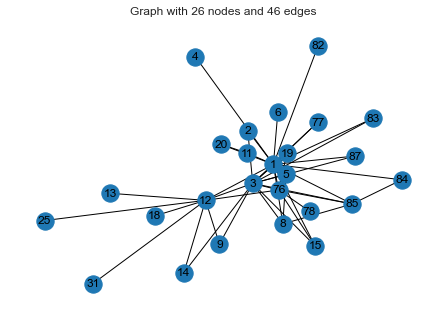

****************************************************************************************
Graph for phase: 7


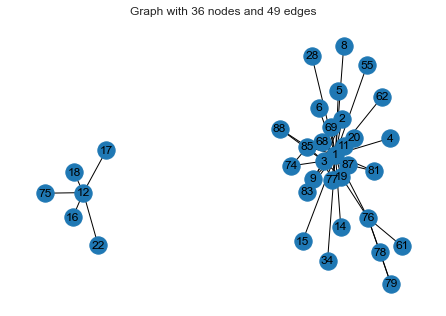

****************************************************************************************
Graph for phase: 8


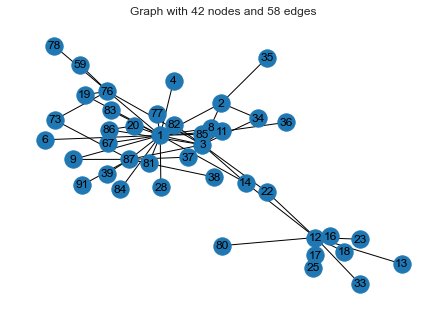

****************************************************************************************
Graph for phase: 9


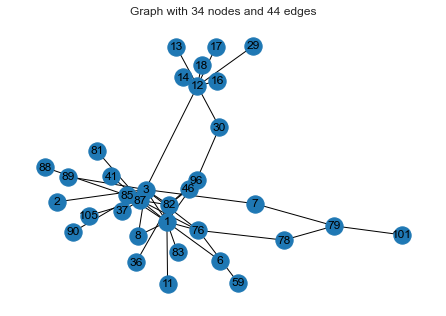

****************************************************************************************
Graph for phase: 10


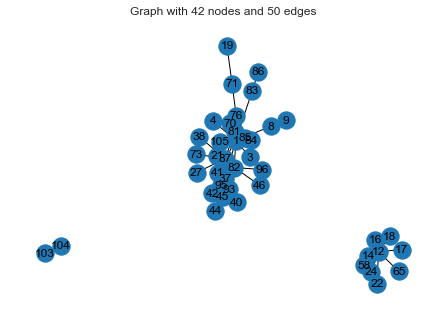

****************************************************************************************
Graph for phase: 11


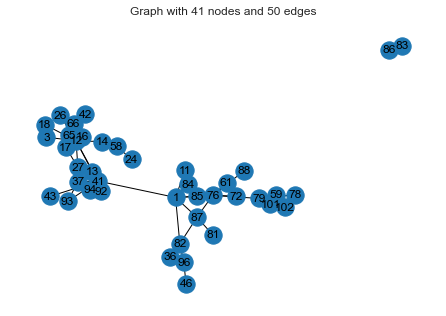

In [10]:
# Visualizing the graphs created above.

for i, g in enumerate(graphs):
    print("****************************************************************************************")
    
    print("Graph for phase:", i + 1)
    
    nx.draw(g, with_labels = True)
    
    plt.title(str(g))
    
    plt.show()

## **Centrality Measures**
- Analysing the various centrality measures for the above graphs.

In [11]:
# Let us store the degree centralities for each node of a graph in a dictionary
deg_cen = {}

for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)

In [12]:
# Let us look at the deg_cen dictionary
deg_cen

{<networkx.classes.graph.Graph at 0x1dfec101e20>: {5: 0.07142857142857142,
  83: 0.14285714285714285,
  3: 0.14285714285714285,
  90: 0.07142857142857142,
  88: 0.2857142857142857,
  85: 0.21428571428571427,
  89: 0.14285714285714285,
  4: 0.07142857142857142,
  8: 0.07142857142857142,
  64: 0.07142857142857142,
  6: 0.21428571428571427,
  54: 0.07142857142857142,
  7: 0.07142857142857142,
  2: 0.07142857142857142,
  1: 0.8571428571428571},
 <networkx.classes.graph.Graph at 0x1dfec191d00>: {3: 0.13043478260869565,
  85: 0.08695652173913043,
  83: 0.08695652173913043,
  90: 0.043478260869565216,
  64: 0.08695652173913043,
  6: 0.043478260869565216,
  2: 0.043478260869565216,
  7: 0.043478260869565216,
  86: 0.043478260869565216,
  88: 0.13043478260869565,
  89: 0.13043478260869565,
  12: 0.043478260869565216,
  11: 0.08695652173913043,
  9: 0.043478260869565216,
  76: 0.08695652173913043,
  98: 0.043478260869565216,
  47: 0.043478260869565216,
  97: 0.043478260869565216,
  56: 0.0434782

### **b. Eigenvector, Betweenness, and Closeness Centrality measures**

In [13]:
# Similarily for other other centrality measures

# Eigenvector Centrality
eig_cen = {}

for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)

# Betweenness Centrality
betw_cen = {}

for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality
clo_cen = {}

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

**Observations:**

- We have now created the dictionaries with the centrality measures
- The dictionaries are deg_cen, eig_cen, betw_cen, and clo_cen.
- We can sort the dictionaries, in descending order, to obtain the nodes that are the most important.

In [14]:
# Sorting the degree centrality measure and using it to identify the important nodes

for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key = deg_cen[g].get, reverse = True):
        temp_dict[w] = deg_cen[g][w]
    print("Sorted importance of nodes in terms of deg_cen for Phase {} is {}".format(ix + 1, list(temp_dict.keys())[:5]))
    print()

Sorted importance of nodes in terms of deg_cen for Phase 1 is [1, 88, 85, 6, 83]

Sorted importance of nodes in terms of deg_cen for Phase 2 is [1, 3, 88, 89, 8]

Sorted importance of nodes in terms of deg_cen for Phase 3 is [1, 3, 83, 49, 9]

Sorted importance of nodes in terms of deg_cen for Phase 4 is [1, 83, 3, 89, 85]

Sorted importance of nodes in terms of deg_cen for Phase 5 is [1, 12, 3, 31, 89]

Sorted importance of nodes in terms of deg_cen for Phase 6 is [1, 3, 12, 76, 85]

Sorted importance of nodes in terms of deg_cen for Phase 7 is [1, 3, 12, 76, 19]

Sorted importance of nodes in terms of deg_cen for Phase 8 is [1, 3, 12, 87, 76]

Sorted importance of nodes in terms of deg_cen for Phase 9 is [3, 1, 12, 87, 82]

Sorted importance of nodes in terms of deg_cen for Phase 10 is [1, 87, 37, 12, 82]

Sorted importance of nodes in terms of deg_cen for Phase 11 is [12, 41, 76, 1, 79]



- **We can see the degree centrality based top 5 most important nodes for each phase.**


## **Understanding the variation of node importance across phases**

- From the above analysis, some nodes appear to be more important than others, and we will focus our attention on analyzing those nodes.

- Let us take out Node1, Node3, and Node12 and visualize their importance across phases. We will use the betweenness and degree centrality only. 

In [15]:

# Node 1
node1_deg = []

phases = []

for ix, g in enumerate(graphs):
    node1_deg.append(deg_cen[g][1]*100)
    phases.append(ix + 1)

node1_bet = []

for ix, g in enumerate(graphs):
    node1_bet.append(betw_cen[g][1]*100)

# Node 3
node3_deg = []

for ix, g in enumerate(graphs):
    node3_deg.append(deg_cen[g][3]*100)

node3_bet = []

for ix, g in enumerate(graphs):
    node3_bet.append(betw_cen[g][3]*100)

# Node 12
node12_deg = []

for ix, g in enumerate(graphs):
    if (12 in deg_cen[g].keys()):
        node12_deg.append(deg_cen[g][12]*100)
    else:
        node12_deg.append(None)

node12_bet = []

for ix, g in enumerate(graphs):
    if (12 in betw_cen[g].keys()):
        node12_bet.append(betw_cen[g][12]*100)
    else:
        node12_bet.append(None)

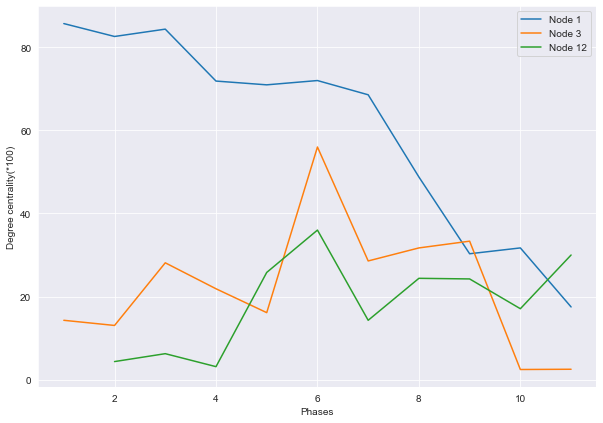

In [16]:
# Now, let us plot the importance of nodes across phases

# Ploting Degree centrality for nodes 1, 3, and 12
plt.figure(figsize = (10, 7))

plt.plot(phases, node1_deg, label = 'Node 1')

plt.plot(phases, node3_deg, label = 'Node 3')

plt.plot(phases, node12_deg, label = 'Node 12')

plt.ylabel('Degree centrality(*100)')

plt.xlabel('Phases')

plt.legend()

plt.show()

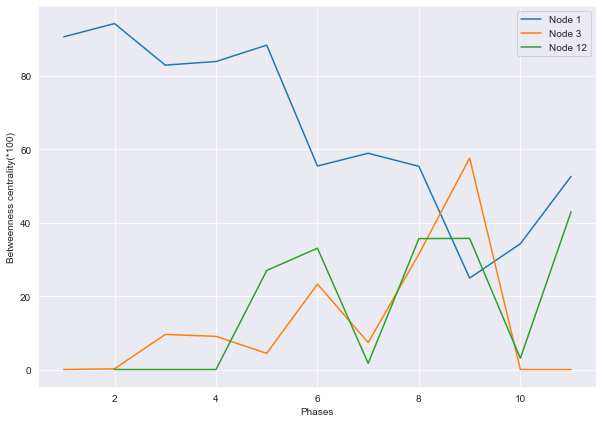

In [17]:
# Plotting the Betweenness Centrality for nodes 1, 3, and 12

plt.figure(figsize = (10, 7))

plt.plot(phases, node1_bet,  label = 'Node 1')

plt.plot(phases, node3_bet, label = 'Node 3')

plt.plot(phases, node12_bet, label = 'Node 12')

plt.ylabel('Betweenness centrality(*100)')

plt.xlabel('Phases')

plt.legend()

plt.show()

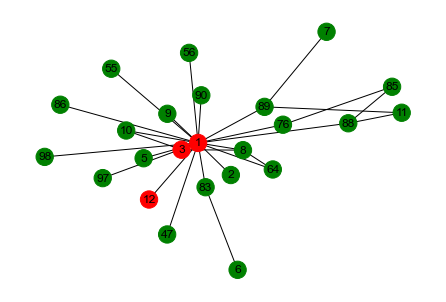

In [18]:
## highlight the important nodes in graphs for phase 2 graph: graph2

graph2 = nx.from_pandas_adjacency(P2)

color = []

for node in graph2:
    if (node == 1 or node == 12  or node == 3):
        color.append('red')
    else:
        color.append('green')

nx.draw_spring(graph2, node_color = color, with_labels = True)

**Observation:**

- The important nodes, i.e., nodes 1, 3, and 12 have been marked as red.

## **Conclusion:**

- We carried out the analysis on the network and figured out techniques to read adjacency matrices into graphs.
- We later visualized the graphs, created centrality measures, and identified the important nodes - N1 (Daniel Serero), N3 (Pierre Perlini), N12 (Ernesto Morales).
- We studied and plotted the variation in the centrality of the important nodes across phases in a bid to understand the affect of disruption in the network.